In [1]:
# Stack overflow survey analysis

Each year,Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences.in 2022 over 60,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want.

In [2]:
import pandas as pd


In [3]:
survey_raw_df = pd.read_csv('survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64461 responses to 61 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText

In [5]:
schema_raw_df=pd.read_csv('survey_results_schema.csv')
schema_raw_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [6]:
schema_raw_df.set_index('Column', inplace= True)
schema_raw_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [8]:
schema_raw_df.loc['YearsCode','QuestionText']

'Including any education, how many years have you been coding in total?'

# Data processing and cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience, and preferences
* Employment-related information, preferences, and opinions

In [9]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [10]:
len(selected_columns)

20

In [11]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
survey_df.shape

(64461, 20)

## Summary of dataset

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [14]:
schema_raw_df.loc['Age1stCode','QuestionText']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [15]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [16]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [17]:
#Statistical properties of dataset
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [21]:
filt1=(survey_df['Age'] < 10)                           #ignore entries where the value for the column is less than 10 and greater than 100.
survey_df.drop(index= survey_df[filt1].index , inplace=True)

In [22]:
filt2=(survey_df['Age'] > 100)
survey_df.drop(index= survey_df[filt2].index , inplace=True)

In [23]:
filt3= (survey_df['WorkWeekHrs'] > 140)                     #ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).
survey_df.drop(index= survey_df[filt3].index , inplace=True)

In [24]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [26]:
import numpy as np

In [27]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na=False)), np.nan, inplace=True)

In [28]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [29]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
10535,Russian Federation,30.0,Man,"Professional degree (JD, MD, etc.)","Information systems, information technology, o...",Yes,14.0,5.0,2.0,C#,C#,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, front-end",20.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Fairly important
21724,Spain,30.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,13.0,12.0,3.0,Bash/Shell/PowerShell;HTML/CSS;Java;PHP;Python...,Bash/Shell/PowerShell;Python;Scala;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist;...,40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Fairly important
33541,United States,32.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",No,14.0,17.0,10.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
34177,United Kingdom,45.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A humanities discipline (such as literature, h...",Yes,6.0,10.0,10.0,HTML/CSS;JavaScript;Ruby;SQL,HTML/CSS;JavaScript;Ruby;SQL,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,Senior executive/VP,70.0,Very satisfied,Family friendliness,Often: 1-2 days per week or more,Not at all important/not necessary
54351,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,22.0,7.0,3.0,C;C#;Dart;Java;Kotlin;PHP,C#;Dart,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,NaN,Somewhat important
62825,Czech Republic,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
42240,Pakistan,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,4.0,NaN,C#;Swift,Swift,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,NaN
4313,Canada,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,11.0,4.0,Java;SQL,Dart;Go;Java;Rust,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
6451,United States,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,19.0,10.0,3.0,Assembly;Bash/Shell/PowerShell;C;C++,Assembly;Bash/Shell/PowerShell;C;C#;C++,Once a year,Go for a walk or other physical activity;Do ot...,Employed full-time,"Developer, game or graphics",40.0,Very satisfied,Specific department or team I’d be working on;...,Sometimes: 1-2 days per month but less than we...,Critically important
5933,United States,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,19.0,6.0,4.0,Java;Ruby,Go;Java;Kotlin;Python;Ruby,Once every few years,Visit Stack Ove

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country
Top 10 countries with highest no. of responses

In [31]:
schema_raw_df.loc['Country','QuestionText']

'Where do you live?'

In [32]:
survey_df['Country'].nunique()

183

In [33]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

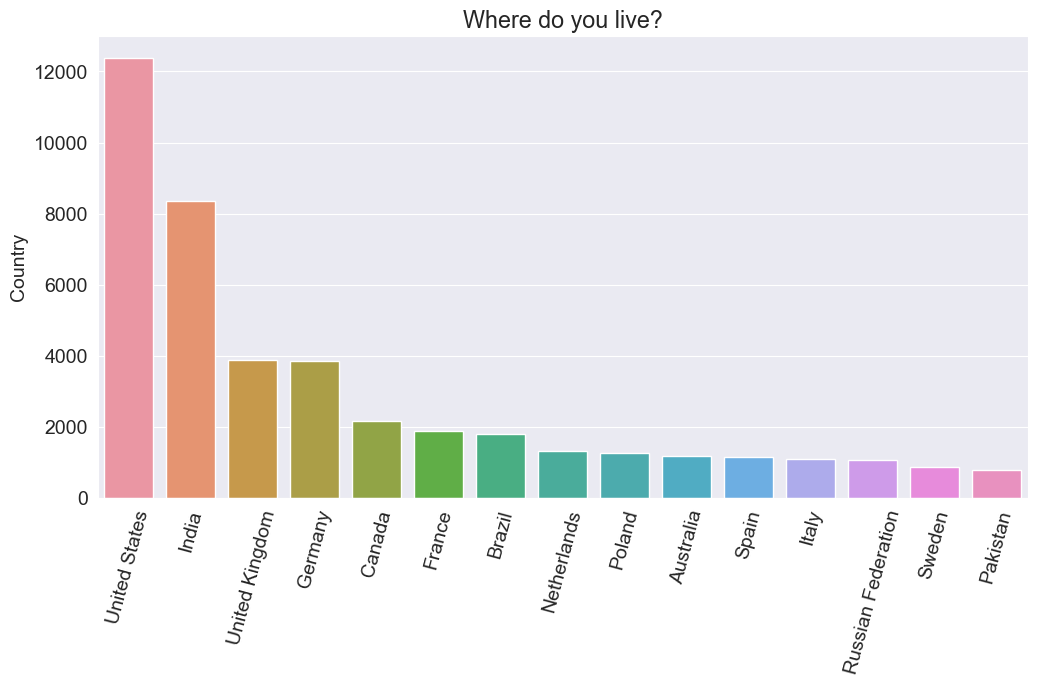

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_raw_df.loc['Country','QuestionText'])
sns.barplot(x=top_countries.index, y=top_countries);

# Age
The distribution of respondent's age

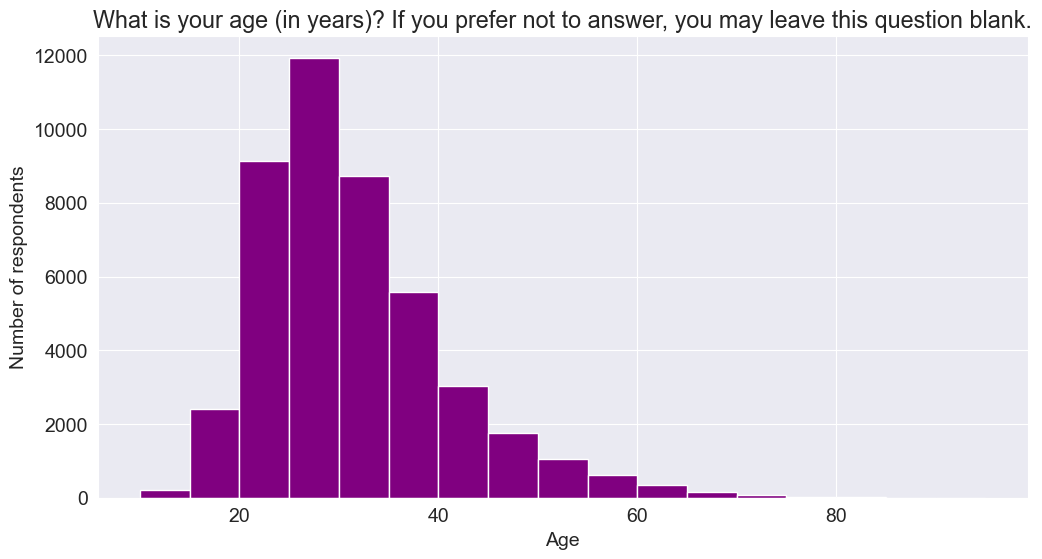

In [35]:
plt.figure(figsize=(12, 6))
plt.title(schema_raw_df.loc['Age','QuestionText'])
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df['Age'], bins=np.arange(10,100,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old

# Gender
distribution of responses for the Gender

In [36]:
schema_raw_df.loc['Gender','QuestionText']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [37]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

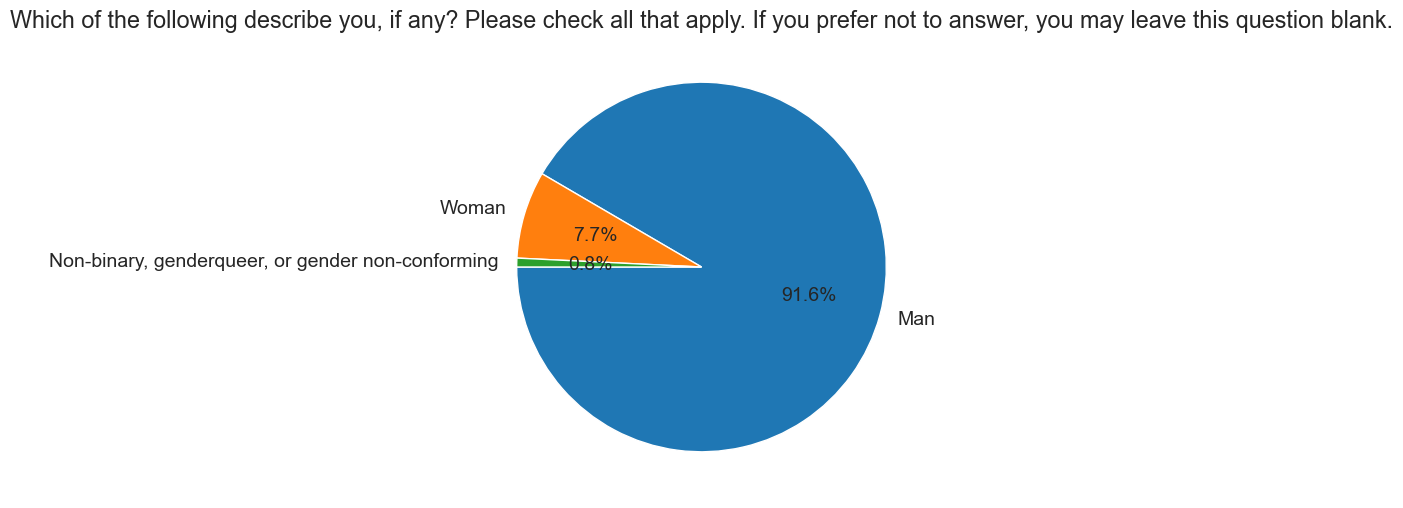

In [38]:
plt.figure(figsize=(12,6))
plt.title(schema_raw_df.loc['Gender','QuestionText'])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

# Education Level
distribution of responses on basis of their educational background/degree.

In [39]:
schema_raw_df.loc['EdLevel','QuestionText']

'Which of the following best describes the highest level of formal education that you’ve completed?'

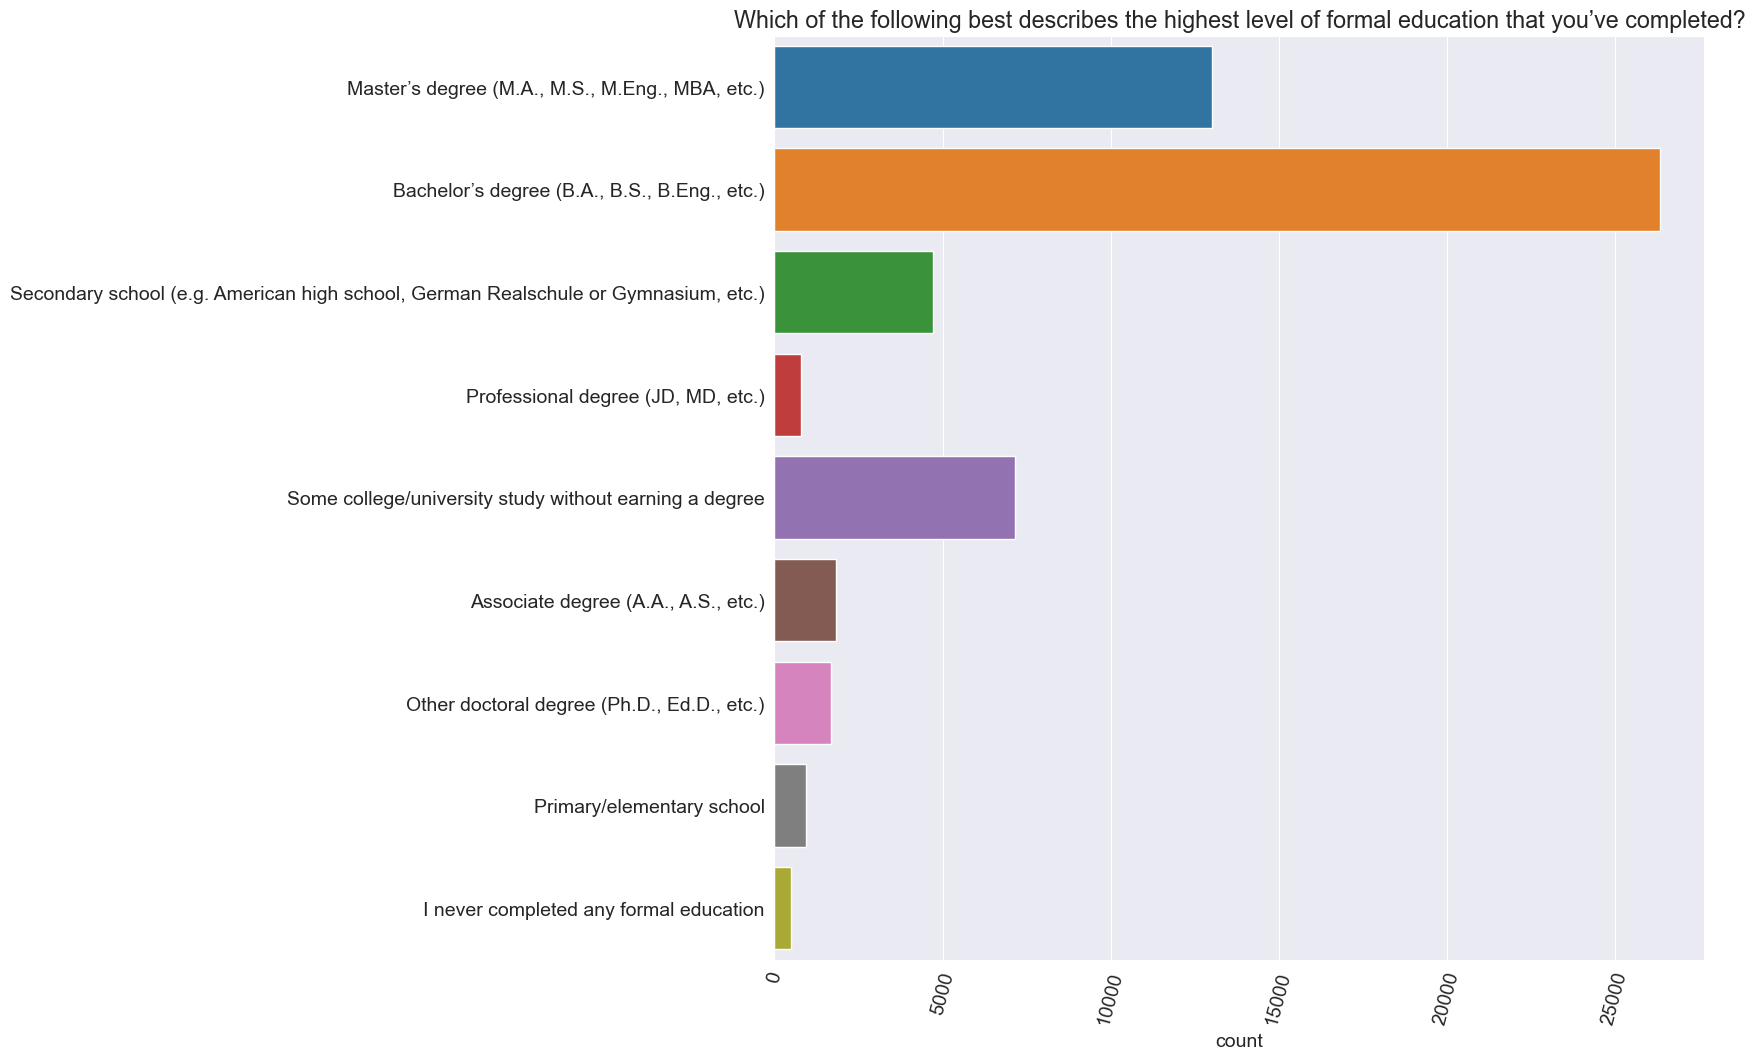

In [40]:
plt.figure(figsize=(12,12))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema_raw_df.loc['EdLevel','QuestionText'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education

In [41]:
schema_raw_df.loc['UndergradMajor','QuestionText']

'What was your primary field of study?'

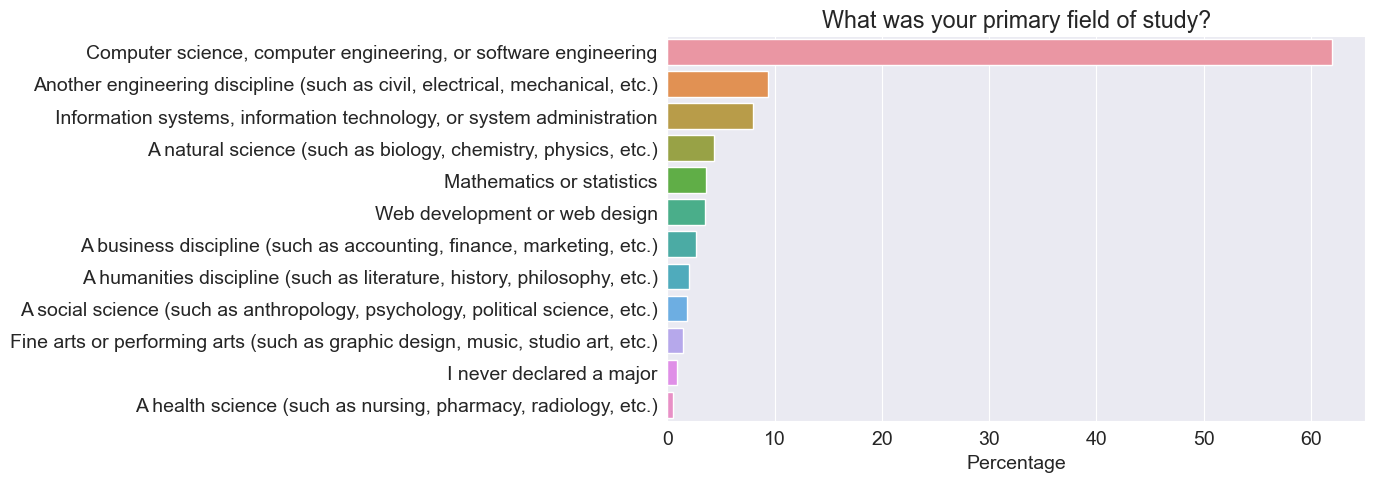

In [42]:
undergrad_pct = survey_df['UndergradMajor'].value_counts() * 100 / survey_df['UndergradMajor'].count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema_raw_df.loc['UndergradMajor','QuestionText'])
plt.ylabel(None);
plt.xlabel('Percentage');

# Employment

In [43]:
schema_raw_df.loc['Employment','QuestionText']

'Which of the following best describes your current employment status?'

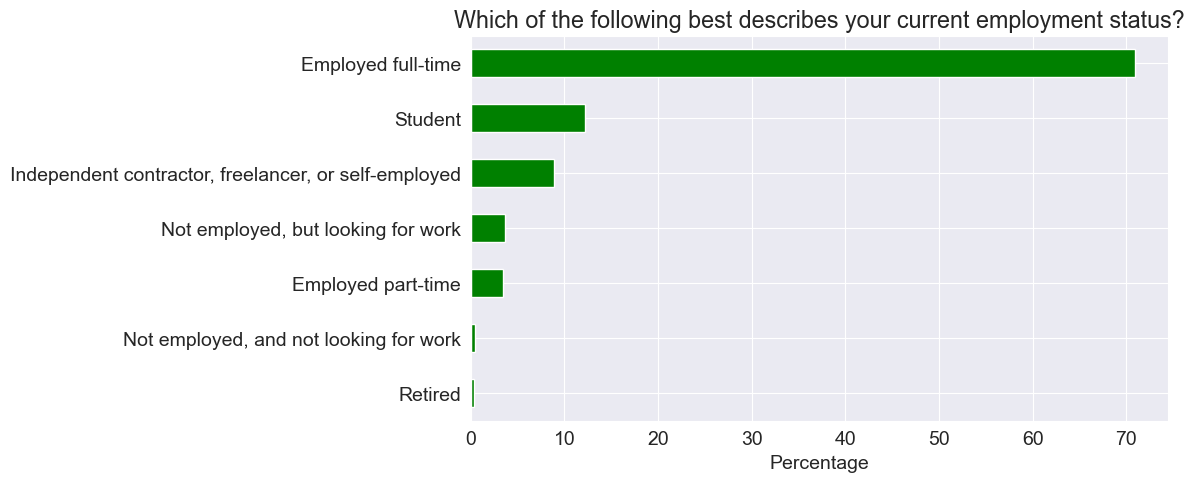

In [44]:
(survey_df['Employment'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema_raw_df.loc['Employment','QuestionText'])
plt.xlabel('Percentage');

In [45]:
schema_raw_df.loc['DevType','QuestionText']

'Which of the following describe you? Please select all that apply.'

In [46]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [47]:
#helper function
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [48]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

# Asking and Answering Questions

### Q: What are the most popular programming languages in 2022?

In [50]:
survey_df['LanguageWorkedWith']

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [51]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

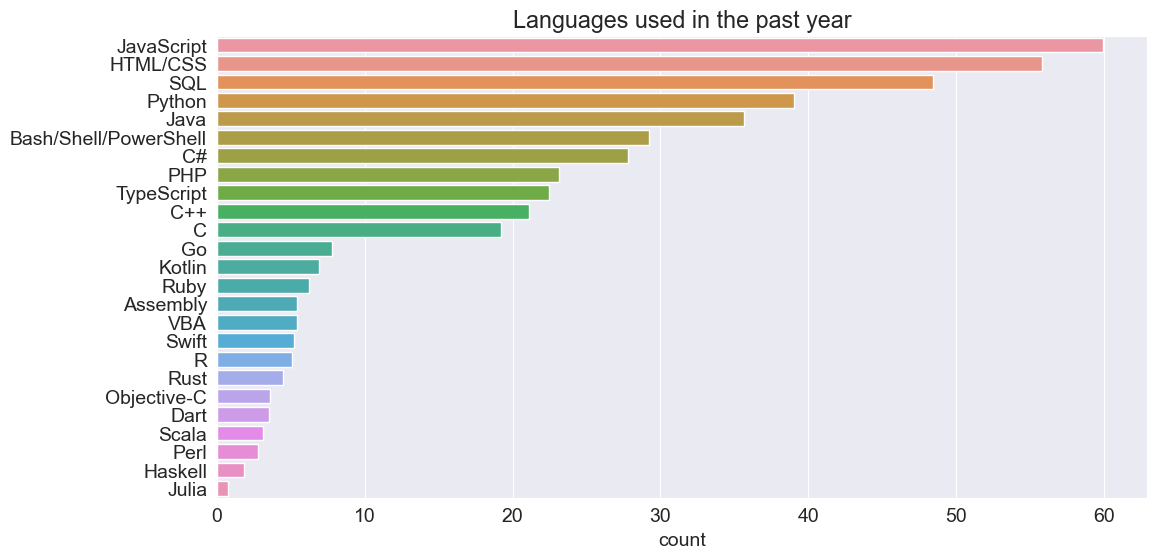

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

### Q: Which languages are the most people interested to learn over the next year?

In [54]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

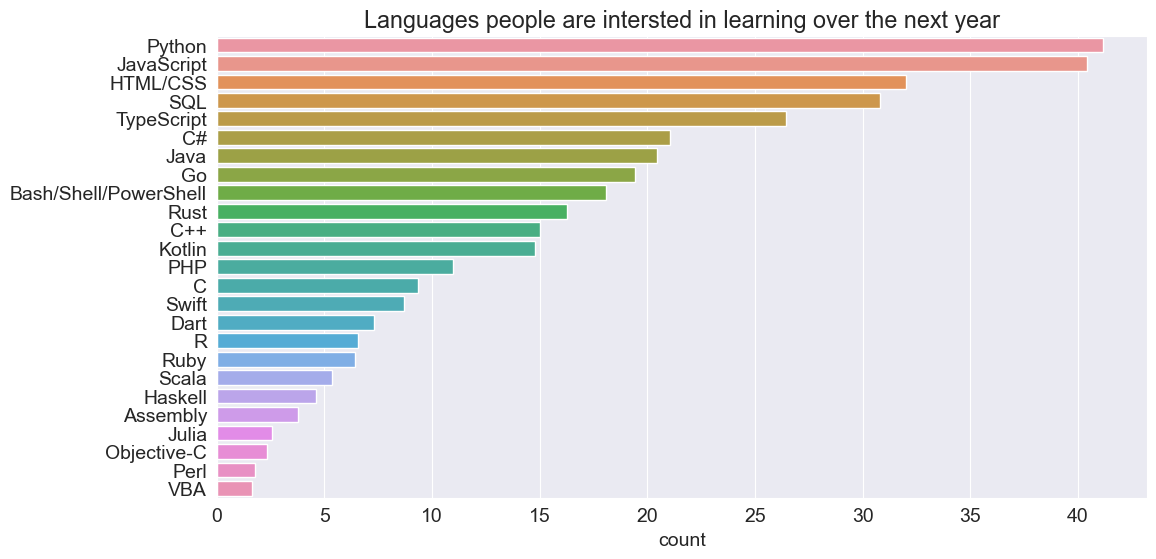

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

In [56]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

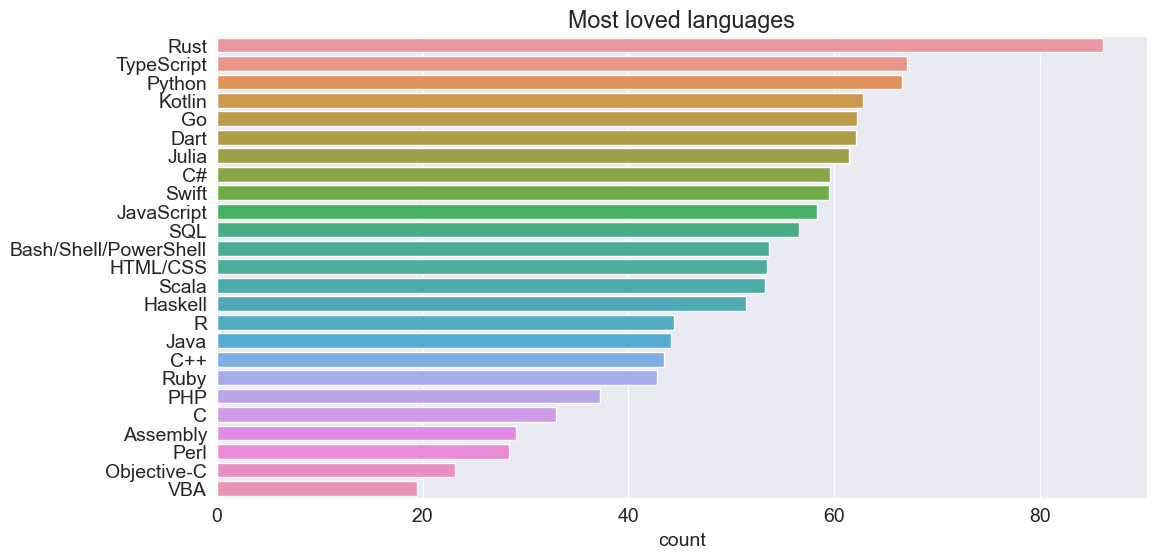

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only

In [58]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [59]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [60]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


### Q: How important is it to start young to build a career in programming?

In [61]:
schema_raw_df.loc['YearsCodePro','QuestionText']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

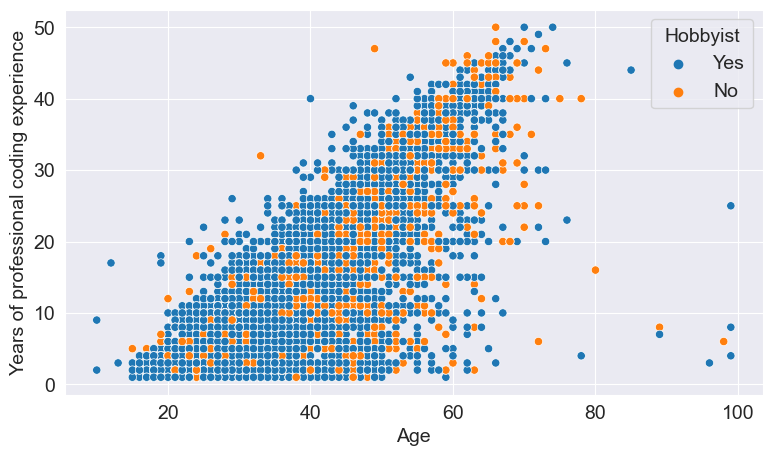

In [62]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

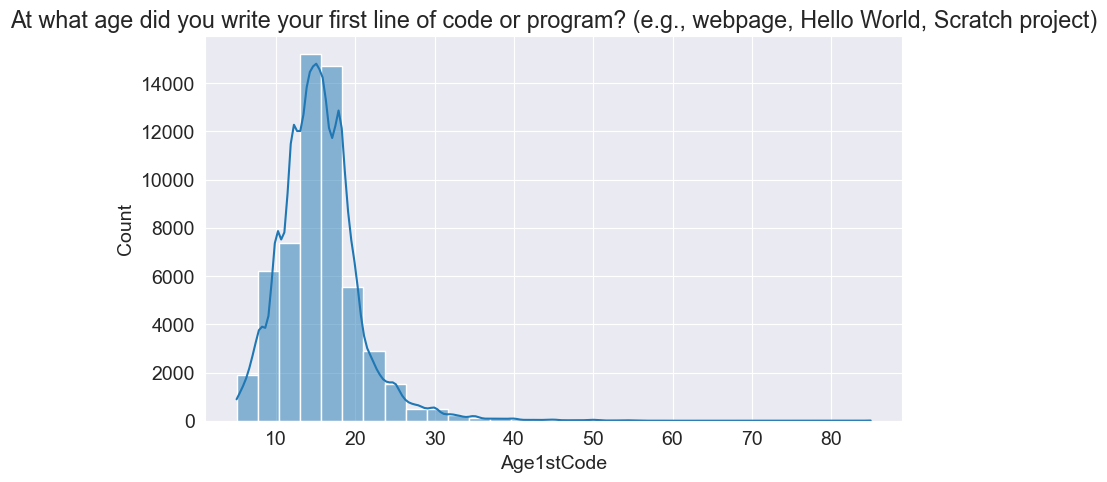

In [63]:
plt.title(schema_raw_df.loc['Age1stCode','QuestionText'])
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True); 